In [1]:
from __future__ import print_function
from pathlib import Path

In [2]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display


In [3]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [4]:
mp3dir = 'piano_first_thirty_sec'

In [5]:
#colnames = ['composer','description', 'symphony', 'file', 'part', 'tempo', 'bpm']
musicdf = pd.read_csv('./musicdf.csv', index_col=0, encoding='latin-1')

In [6]:
def load(audio_path):
    audio_path = '.\\'+ mp3dir + '\\' + audio_path
    my_file = Path(audio_path)
    if my_file.is_file():
        return librosa.load(audio_path, sr=None)
    else:
        return None, None

In [46]:
def getbpm(audio_path):
    y, sr = load(audio_path)
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    return librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]

In [47]:
def getDuration(audio_path):
    y, sr = load(audio_path)
    return librosa.core.get_duration(y,sr)

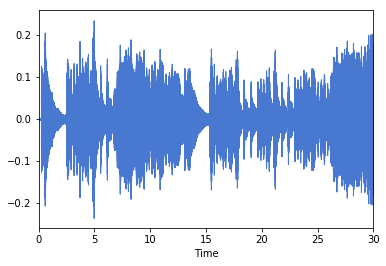

In [12]:
x, sr= load(musicdf.iloc[0].file)
librosa.display.waveplot(x, sr=sr)

In [48]:
def getZeroCrossings(audio_path):
    y, sr = load(audio_path)
    return sum(librosa.zero_crossings(y, pad=False, threshold=0.001))

In [49]:
## http://musicinformationretrieval.com/spectral_features.html
## http://cs229.stanford.edu/proj2016/report/NiShiWugofski_FinalReport.pdf
def getAvgSpectralCentroid(audio_path):
    y, sr = load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
    return spectral_centroids.mean()

def getAvgSpectralBW(audio_path):
    y, sr = load(audio_path)
    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
    return spectral_bandwidth_2.mean()

In [48]:
## http://musicinformationretrieval.com/chroma.html
hop_length = 512
def chroma(audio_path):
    y, sr = load(audio_path)
    chromagram = librosa.feature.chroma_cens(y, sr=sr, hop_length=hop_length)
    return pd.Series({
              "Chroma_C":chromagram[0].mean(), "Chroma_C#":chromagram[1].mean(),
              "Chroma_D":chromagram[2].mean(), "Chroma_D#":chromagram[3].mean(),
              "Chroma_E":chromagram[4].mean(), "Chroma_F":chromagram[5].mean(),
              "Chroma_F#":chromagram[6].mean(), "Chroma_G":chromagram[7].mean(),
              "Chroma_G#":chromagram[8].mean(), "Chroma_A":chromagram[9].mean(),
              "Chroma_A#":chromagram[10].mean(), "Chroma_B":chromagram[11].mean(),
              "Chroma_SD_C":chromagram[0].std(), "Chroma_SD_C#":chromagram[1].std(),
              "Chroma_SD_D":chromagram[2].std(), "Chroma_SD_D#":chromagram[3].std(),
              "Chroma_SD_E":chromagram[4].std(), "Chroma_SD_F":chromagram[5].std(),
              "Chroma_SD_F#":chromagram[6].std(), "Chroma_SD_G":chromagram[7].std(),
              "Chroma_SD_G#":chromagram[8].std(), "Chroma_SD_A":chromagram[9].std(),
              "Chroma_SD_A#":chromagram[10].std(), "Chroma_SD_B":chromagram[11].std()})

In [35]:
def mfcc(audio_path):
    y, sr = load(audio_path)
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=12)
    return pd.Series({
              "MFCC_0":mfcc[0].mean(), "MFCC_1":mfcc[1].mean(),
              "MFCC_2":mfcc[2].mean(), "MFCC_3":mfcc[3].mean(),
              "MFCC_4":mfcc[4].mean(), "MFCC_5":mfcc[5].mean(),
              "MFCC_6":mfcc[6].mean(), "MFCC_7":mfcc[7].mean(),
              "MFCC_8":mfcc[8].mean(), "MFCC_9":mfcc[9].mean(),
              "MFCC_10":mfcc[10].mean(), "MFCC_11":mfcc[11].mean(),
              "MFCC_SD_0":mfcc[0].std(), "MFCC_SD_1":mfcc[1].std(),
              "MFCC_SD_2":mfcc[2].std(), "MFCC_SD_3":mfcc[3].std(),
              "MFCC_SD_4":mfcc[4].std(), "MFCC_SD_5":mfcc[5].std(),
              "MFCC_SD_6":mfcc[6].std(), "MFCC_SD_7":mfcc[7].std(),
              "MFCC_SD_8":mfcc[8].std(), "MFCC_SD_9":mfcc[9].std(),
              "MFCC_SD_10":mfcc[10].std(), "MFCC_SD_11":mfcc[11].std()
    })    

In [51]:
musicdf['bpm'] = musicdf['file'].apply(getbpm)

In [52]:
musicdf['duration'] = musicdf['file'].apply(getDuration)

In [53]:
musicdf['zero_crossings'] = musicdf['file'].apply(getZeroCrossings)

In [54]:
musicdf['spectral_centroid_avg'] =  musicdf['file'].apply(getAvgSpectralCentroid)

In [55]:
musicdf['spectral_bw_avg'] =  musicdf['file'].apply(getAvgSpectralBW)

In [47]:
musicdf = pd.concat([musicdf, musicdf['file'].apply(chroma)], axis=1)
#musicdf.update(musicdf['file'].apply(chroma))

In [ ]:
musicdf = pd.concat([musicdf, musicdf['file'].apply(mfcc)], axis=1)

In [51]:
musicdf.to_csv('musicdf30.csv', encoding='latin-1')

In [50]:
musicdf.shape

(61, 59)